<a href="https://colab.research.google.com/github/JLRRC/MASTERIA/blob/main/Algoritmos_R1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de optimización - Reto 1

Nombre: Jesus Lozano Rodriguez <br>
Github: <br>

## Torres de Hanoi con Divide y vencerás

Resuelve el problema de las [Torres de Hanoi](https://es.wikipedia.org/wiki/Torres_de_Han%C3%B3i) para un número arbitrario de fichas utilizando la técnica de divide y vencerás.

In [4]:
# Torres de Hanoi
def torres_de_hanoi(n, origen, destino, auxiliar):
    """
    Resuelve el problema de las Torres de Hanói utilizando divide y vencerás.

    Args:
    n (int): Número de discos.
    origen (str): El nombre de la torre origen.
    destino (str): El nombre de la torre destino.
    auxiliar (str): El nombre de la torre auxiliar.
    """
    if n == 0:
        return  # Caso base: no hay discos que mover.

    # Divide: mueve los n-1 discos superiores al auxiliar.
    torres_de_hanoi(n - 1, origen, auxiliar, destino)

    # Conquista: mueve el disco más grande al destino.
    print(f"Mover disco {n} de {origen} a {destino}")

    # Vencer: mueve los n-1 discos del auxiliar al destino.
    torres_de_hanoi(n - 1, auxiliar, destino, origen)

# Ejemplo: Resolver las Torres de Hanói para un número arbitrario de discos.
n = int(input("Introduce el número de discos: "))  # Entrada del número de discos
torres_de_hanoi(n, "Origen", "Destino", "Auxiliar")

Introduce el número de discos: 3
Mover disco 1 de Origen a Destino
Mover disco 2 de Origen a Auxiliar
Mover disco 1 de Destino a Auxiliar
Mover disco 3 de Origen a Destino
Mover disco 1 de Auxiliar a Origen
Mover disco 2 de Auxiliar a Destino
Mover disco 1 de Origen a Destino


## Sucesión de Fibonacci

Cálcula el n-ésimo término de la [Sucesión de Fibonacci](https://es.wikipedia.org/wiki/Sucesi%C3%B3n_de_Fibonacci) mediante un algoritmo recursivo y otro iterativo. Representa gráficamente cómo crece el tiempo de cómputo en función del número de términos para ambos algoritmos.

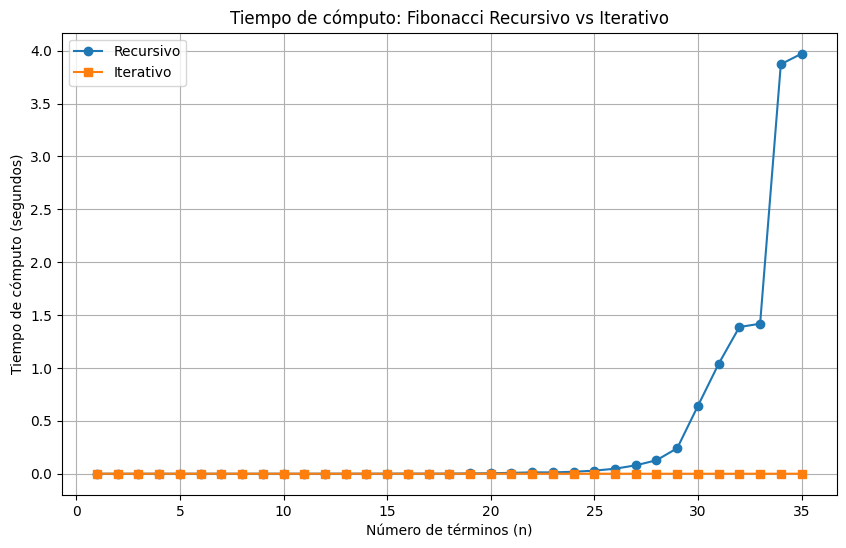

In [5]:
#Sucesión_de_Fibonacci

import time
import matplotlib.pyplot as plt

# Algoritmo recursivo para calcular el n-ésimo término de Fibonacci
def fibonacci_recursivo(n):
    if n <= 1:
        return n
    return fibonacci_recursivo(n - 1) + fibonacci_recursivo(n - 2)

# Algoritmo iterativo para calcular el n-ésimo término de Fibonacci
def fibonacci_iterativo(n):
    if n <= 1:
        return n
    a, b = 0, 1
    for _ in range(2, n + 1):
        a, b = b, a + b
    return b

# Medir el tiempo de cómputo para un algoritmo dado
def medir_tiempo(algoritmo, n):
    inicio = time.time()
    algoritmo(n)
    fin = time.time()
    return fin - inicio

# Generar datos para la gráfica
n_terms = range(1, 36)  # Calcular para valores de n desde 1 hasta 35
tiempos_recursivo = []
tiempos_iterativo = []

for n in n_terms:
    tiempos_recursivo.append(medir_tiempo(fibonacci_recursivo, n))
    tiempos_iterativo.append(medir_tiempo(fibonacci_iterativo, n))

# Graficar los tiempos de cómputo
plt.figure(figsize=(10, 6))
plt.plot(n_terms, tiempos_recursivo, label='Recursivo', marker='o')
plt.plot(n_terms, tiempos_iterativo, label='Iterativo', marker='s')
plt.xlabel('Número de términos (n)')
plt.ylabel('Tiempo de cómputo (segundos)')
plt.title('Tiempo de cómputo: Fibonacci Recursivo vs Iterativo')
plt.legend()
plt.grid(True)
plt.show()

## Devolución de cambio por técnica voraz

Resuelve el [Problema del Cambio de Moneda](https://es.wikipedia.org/wiki/Problema_de_cambio_de_monedas) utilizando una técnica voraz.

In [6]:
# Problema del cambio de moneda

def cambio_moneda(vuelto, monedas):
    """
    Resuelve el problema del cambio de moneda utilizando un enfoque voraz.

    Args:
        vuelto (int): El monto total a devolver.
        monedas (list): Lista de denominaciones de monedas disponibles, ordenadas de mayor a menor.

    Returns:
        dict: Un diccionario con las monedas usadas y su cantidad.
    """
    monedas_usadas = {}
    for moneda in monedas:
        if vuelto == 0:
            break
        cantidad = vuelto // moneda  # Número de monedas de esta denominación
        if cantidad > 0:
            monedas_usadas[moneda] = cantidad
            vuelto -= cantidad * moneda  # Reducir el monto pendiente
    return monedas_usadas

# Ejemplo de uso
monedas_disponibles = [50, 20, 10, 5, 2, 1]  # Denominaciones de monedas
monto_a_cambiar = 93  # Monto a devolver

resultado = cambio_moneda(monto_a_cambiar, monedas_disponibles)

# Imprimir resultado
print(f"Monto a devolver: {monto_a_cambiar}")
print("Monedas usadas:")
for moneda, cantidad in resultado.items():
    print(f" - {cantidad} moneda(s) de {moneda}")

Monto a devolver: 93
Monedas usadas:
 - 1 moneda(s) de 50
 - 2 moneda(s) de 20
 - 1 moneda(s) de 2
 - 1 moneda(s) de 1


## N-Reinas por técnica de vuelta atrás
Resuelve el [Problema de las N-Reinas](https://es.wikipedia.org/wiki/Problema_de_las_ocho_reinas) en un tablero de dimensión N mediante la técnica de la vuelta atrás (backtraking).

In [8]:
# Problema de las N-Reinas
def imprimir_tablero(tablero, n):
    """
    Imprime el tablero con las posiciones de las reinas.

    Args:
        tablero (list): Lista que contiene la posición de las reinas en cada fila.
        n (int): Dimensión del tablero.
    """
    print("\nTablero:")
    for fila in range(n):
        linea = ""
        for columna in range(n):
            if tablero[fila] == columna:
                linea += " Q "  # Colocar reina
            else:
                linea += " . "  # Espacio vacío
        print(linea)

def es_seguro(tablero, fila, col, n):
    """
    Verifica si es seguro colocar una reina en la posición (fila, col).
    """
    for i in range(fila):
        if tablero[i] == col or \
           tablero[i] - i == col - fila or \
           tablero[i] + i == col + fila:
            return False
    return True

def resolver_n_reinas(tablero, fila, n):
    """
    Resuelve el problema de las N-Reinas utilizando backtracking.
    """
    if fila == n:
        return True  # Se encontró una solución completa
    for col in range(n):
        if es_seguro(tablero, fila, col, n):
            tablero[fila] = col  # Colocar reina
            if resolver_n_reinas(tablero, fila + 1, n):  # Intentar la siguiente fila
                return True
            tablero[fila] = -1  # Backtrack
    return False

def n_reinas(n):
    """
    Encuentra una solución para el problema de las N-Reinas y la imprime.
    """
    tablero = [-1] * n  # Inicializar el tablero
    if resolver_n_reinas(tablero, 0, n):
        imprimir_tablero(tablero, n)
    else:
        print("No se encontró solución.")

# Resolver para un tablero de 8x8
n = 8
n_reinas(n)


Tablero:
 Q  .  .  .  .  .  .  . 
 .  .  .  .  Q  .  .  . 
 .  .  .  .  .  .  .  Q 
 .  .  .  .  .  Q  .  . 
 .  .  Q  .  .  .  .  . 
 .  .  .  .  .  .  Q  . 
 .  Q  .  .  .  .  .  . 
 .  .  .  Q  .  .  .  . 
